In [1]:
import pytools.leantools as lt
import pandas as pd
import os
from IPython.display import display

In [2]:
script_dir = os.path.abspath('') #<-- absolute dir the script is in
result_dir = os.path.join (script_dir, "../results/parallax/backtest3")
test_name="2016-2019_Major28_loose"
algo_result_filepath = os.path.join(result_dir, f'{test_name}.json')
analysis_data_filepath = os.path.join(result_dir, f'{test_name}-analysis_data.json')
SYMBOLS = ['EURUSD', 'USDJPY', 'GBPUSD', 'USDCHF', 'USDCAD', 'AUDUSD', 'NZDUSD']
analysis_file_suffix = "-analysis_data"


In [3]:
# Print high level stats

stat_columns = ['TradeStats.TotalNumberOfTrades', 
             'TradeStats.ProfitLossRatio', 
             'PortfolioStats.AverageWinRate', 
             'PortfolioStats.AverageLossRate',
             'PortfolioStats.WinRate',
             'PortfolioStats.Drawdown',
            'PortfolioStats.TotalNetProfit']

def format_stats(stats_df):
    result = stats_df.transpose()
    result.loc['PortfolioStats.AverageWinRate'] = result.loc['PortfolioStats.AverageWinRate'].apply('{:,.2%}'.format)
    result.loc['PortfolioStats.AverageLossRate'] = result.loc['PortfolioStats.AverageLossRate'].apply('{:,.2%}'.format)
    result.loc['PortfolioStats.WinRate'] = result.loc['PortfolioStats.WinRate'].apply('{:,.1%}'.format)
    result.loc['PortfolioStats.Drawdown'] = result.loc['PortfolioStats.Drawdown'].apply('{:,.1%}'.format)
    result.loc['PortfolioStats.TotalNetProfit'] = result.loc['PortfolioStats.TotalNetProfit'].apply('{:,.2%}'.format)
    return result

def get_stats(symbols, timeframe):
    stats_list = []
    for s in symbols:
        name = f'{s}-{timeframe}'
        path = os.path.join(result_dir, f'{name}.json')
        stats = lt.get_trade_statistics(path)
        stats = stats[stat_columns]
        stats.rename(index={0:name}, inplace=True)
        stats_list.append(stats)

stats = lt.get_trade_statistics(algo_result_filepath)
stats = stats[stat_columns]
format_stats(stats)

,0
TradeStats.TotalNumberOfTrades,619
TradeStats.ProfitLossRatio,2.0485
PortfolioStats.AverageWinRate,1.78%
PortfolioStats.AverageLossRate,-0.84%
PortfolioStats.WinRate,28.3%
PortfolioStats.Drawdown,53.9%
PortfolioStats.TotalNetProfit,-47.52%


https://stackoverflow.com/questions/38107304/pandas-changing-a-specific-row-to-percentages

In [4]:
bar_data_df = lt.get_bar_data_df(analysis_data_filepath)
bar_data_df['ratioTop'] = bar_data_df.apply(lambda row: lt.get_bar_ratios(row.O, row.H, row.L, row.C)['top'], axis = 1)
bar_data_df['ratioBody'] = bar_data_df.apply(lambda row: lt.get_bar_ratios(row.O, row.H, row.L, row.C)['body'], axis = 1)
bar_data_df['ratioBottom'] = bar_data_df.apply(lambda row: lt.get_bar_ratios(row.O, row.H, row.L, row.C)['bottom'], axis = 1)

In [5]:
bar_data_df

,,BBMid,BBUpper,BBLower,StochK,StochD,atrPips,O,H,L,C,spread,ratioTop,ratioBody,ratioBottom
Symbol,Time,,,,,,,,,,,,,,
AUDCAD,2016-01-28 22:00:00+00:00,0.9959,1.0075,0.9844,31.7628,32.6098,109.9,0.993785,0.998755,0.989340,0.989910,12.4,0.527881,0.411577,0.060542
AUDCHF,2016-01-28 22:00:00+00:00,0.7050,0.7271,0.6828,87.9223,83.4377,136.0,0.718185,0.728090,0.717405,0.724820,11.4,0.306036,0.620964,0.073000
AUDJPY,2016-01-28 22:00:00+00:00,82.7432,85.8829,79.6036,88.0397,80.0833,193.2,84.168500,86.367500,84.012500,85.803500,9.5,0.239490,0.694268,0.066242
AUDNZD,2016-01-28 22:00:00+00:00,1.0730,1.0935,1.0526,91.6610,88.5812,107.6,1.092985,1.097585,1.089850,1.092830,40.0,0.594699,0.020039,0.385262
AUDUSD,2016-01-28 22:00:00+00:00,0.7000,0.7169,0.6831,81.7033,73.3698,105.8,0.708380,0.714085,0.705895,0.708360,4.2,0.696581,0.002442,0.300977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NZDJPY,2019-12-30 22:00:00+00:00,72.0626,73.6051,70.5200,88.7593,91.9691,50.8,73.253500,73.368500,72.997000,73.111500,12.5,0.309556,0.382234,0.308210
NZDUSD,2019-12-30 22:00:00+00:00,0.6605,0.6726,0.6484,93.2232,94.0295,41.2,0.672795,0.675575,0.671370,0.672915,3.5,0.632580,0.028537,0.338882
USDCAD,2019-12-30 22:00:00+00:00,1.3160,1.3293,1.3026,10.5644,12.1195,56.3,1.306935,1.306965,1.295170,1.299045,4.5,0.002543,0.668928,0.328529


In [6]:
closed_trades = lt.get_closed_trades_df(algo_result_filepath).drop(columns=['Direction', 'TotalFees', 'MAE', 'MFE', 'Symbol.ID', 'Symbol.Permtick'])
#closed_trades

Grab the trade signals

In [7]:
def get_r_multiple(row):
    if row.slPips != 0:
        return row.plPips / row.slPips
    else:
        return 0

trade_setups_df = lt.get_trade_setups_df(analysis_data_filepath)
# calculate some additional data
trade_setups_df['year'] = trade_setups_df.apply(lambda row: row.name.year, axis = 1)
trade_setups_df['RMultiple'] = trade_setups_df.apply(get_r_multiple, axis = 1)

#pd.set_option('display.max_rows', 500)
display(trade_setups_df)
#pd.reset_option('display.max_rows')

,symbol,direction,slPips,tpPips,plPips,tradeIndex,year,RMultiple
BarTime,,,,,,,,
2016-01-31 22:00:00+00:00,GBPAUD,Buy,101.0,499.8,190.9,0,2016,1.890099
2016-02-01 22:00:00+00:00,CADJPY,Sell,81.3,274.0,0.0,-1,2016,0.000000
2016-02-01 22:00:00+00:00,NZDJPY,Sell,66.0,326.6,-69.9,1,2016,-1.059091
2016-02-01 22:00:00+00:00,USDJPY,Sell,67.0,226.0,0.0,-1,2016,0.000000
2016-02-01 22:00:00+00:00,AUDJPY,Sell,99.8,336.3,0.0,-1,2016,0.000000
...,...,...,...,...,...,...,...,...
2019-12-01 22:00:00+00:00,USDJPY,Sell,44.0,148.6,0.0,614,2019,0.000000
2019-12-10 22:00:00+00:00,GBPCAD,Sell,38.9,192.6,76.2,615,2019,1.958869
2019-12-16 22:00:00+00:00,NZDJPY,Sell,26.3,88.7,-31.4,616,2019,-1.193916


In [8]:
# Show R multiple grouped by symbol
r_by_symbol = trade_setups_df[trade_setups_df.tradeIndex >= 0].groupby(['symbol']).sum()
r_by_symbol.sort_values('RMultiple').style.hide_columns(['year', 'tradeIndex'])

,slPips,tpPips,plPips,RMultiple
symbol,,,,
NZDCHF,904.200000,3476.800000,-296.700000,-12.435229
EURAUD,1130.700000,4000.400000,-681.900000,-10.565409
EURCHF,741.600000,2907.200000,-159.400000,-9.838629
CADJPY,857.200000,3037.500000,-390.600000,-8.271736
GBPCHF,1157.500000,4435.600000,-486.200000,-7.823014
NZDJPY,863.000000,3324.700000,-61.800000,-7.553202
USDJPY,981.100000,3560.400000,-350.400000,-6.140068
GBPAUD,2038.000000,7385.300000,-376.400000,-4.884320
CHFJPY,1170.700000,4525.300000,-217.300000,-4.792534


In [9]:
sum_r_group = trade_setups_df[trade_setups_df.tradeIndex >= 0].groupby(['symbol', 'year'])[['RMultiple']].sum()
#sum_r_group.plot(kind='bar', figsize=(20,5))

#pd.set_option('display.max_rows', 500)
#display(sum_r_group)
#pd.reset_option('display.max_rows')

In [10]:
# Combine signal data with closed trade data
merged_trade_data = trade_setups_df.join(closed_trades, on='tradeIndex')
merged_trade_data

,symbol,direction,slPips,tpPips,plPips,tradeIndex,year,RMultiple,EntryTime,EntryPrice,Quantity,ExitTime,ExitPrice,ProfitLoss,Duration,EndTradeDrawdown,Symbol.Value
BarTime,,,,,,,,,,,,,,,,,
2016-01-31 22:00:00+00:00,GBPAUD,Buy,101.0,499.8,190.9,0,2016,1.890099,2016-02-02T03:33:00Z,2.02581,139159.0,2016-02-03T00:31:00Z,2.04490,1867.43,20:58:00,-662.26,GBPAUD
2016-02-01 22:00:00+00:00,CADJPY,Sell,81.3,274.0,0.0,-1,2016,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-01 22:00:00+00:00,NZDJPY,Sell,66.0,326.6,-69.9,1,2016,-1.059091,2016-02-03T00:12:00Z,78.25800,173512.0,2016-02-03T07:55:00Z,78.95700,-1011.36,07:43:00,-1430.95,NZDJPY
2016-02-01 22:00:00+00:00,USDJPY,Sell,67.0,226.0,0.0,-1,2016,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-01 22:00:00+00:00,AUDJPY,Sell,99.8,336.3,0.0,-1,2016,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-01 22:00:00+00:00,USDJPY,Sell,44.0,148.6,0.0,614,2019,0.000000,2019-12-03T00:51:00Z,109.11500,136494.0,2019-12-12T15:02:00Z,109.11500,0.00,9.14:11:00,-851.54,USDJPY
2019-12-10 22:00:00+00:00,GBPCAD,Sell,38.9,192.6,76.2,615,2019,1.958869,2019-12-11T22:15:00Z,1.73826,169313.0,2019-12-12T19:48:00Z,1.73064,978.73,21:33:00,-1066.72,GBPCAD
2019-12-16 22:00:00+00:00,NZDJPY,Sell,26.3,88.7,-31.4,616,2019,-1.193916,2019-12-18T12:35:00Z,72.00000,223856.0,2019-12-18T21:46:00Z,72.31400,-641.50,09:11:00,-718.11,NZDJPY


In [11]:
merged_trade_data.reset_index(inplace=True)
merged_trade_data.set_index(['symbol', 'BarTime'])

,,direction,slPips,tpPips,plPips,tradeIndex,year,RMultiple,EntryTime,EntryPrice,Quantity,ExitTime,ExitPrice,ProfitLoss,Duration,EndTradeDrawdown,Symbol.Value
symbol,BarTime,,,,,,,,,,,,,,,,
GBPAUD,2016-01-31 22:00:00+00:00,Buy,101.0,499.8,190.9,0,2016,1.890099,2016-02-02T03:33:00Z,2.02581,139159.0,2016-02-03T00:31:00Z,2.04490,1867.43,20:58:00,-662.26,GBPAUD
CADJPY,2016-02-01 22:00:00+00:00,Sell,81.3,274.0,0.0,-1,2016,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NZDJPY,2016-02-01 22:00:00+00:00,Sell,66.0,326.6,-69.9,1,2016,-1.059091,2016-02-03T00:12:00Z,78.25800,173512.0,2016-02-03T07:55:00Z,78.95700,-1011.36,07:43:00,-1430.95,NZDJPY
USDJPY,2016-02-01 22:00:00+00:00,Sell,67.0,226.0,0.0,-1,2016,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUDJPY,2016-02-01 22:00:00+00:00,Sell,99.8,336.3,0.0,-1,2016,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USDJPY,2019-12-01 22:00:00+00:00,Sell,44.0,148.6,0.0,614,2019,0.000000,2019-12-03T00:51:00Z,109.11500,136494.0,2019-12-12T15:02:00Z,109.11500,0.00,9.14:11:00,-851.54,USDJPY
GBPCAD,2019-12-10 22:00:00+00:00,Sell,38.9,192.6,76.2,615,2019,1.958869,2019-12-11T22:15:00Z,1.73826,169313.0,2019-12-12T19:48:00Z,1.73064,978.73,21:33:00,-1066.72,GBPCAD
NZDJPY,2019-12-16 22:00:00+00:00,Sell,26.3,88.7,-31.4,616,2019,-1.193916,2019-12-18T12:35:00Z,72.00000,223856.0,2019-12-18T21:46:00Z,72.31400,-641.50,09:11:00,-718.11,NZDJPY


https://pandas.pydata.org/docs/user_guide/merging.html#timeseries-friendly-merging

In [12]:
# Merge trade data with bar data

# only grab attempted trades
attempted_trades = merged_trade_data[(merged_trade_data['slPips'] > 0)]
merged_setups = pd.merge(attempted_trades, bar_data_df, left_on=['symbol', 'BarTime'], right_on=['Symbol','Time'])
#merged_setups = pd.merge(attempted_trades, bar_data_df, left_index=True, right_on=['Symbol','Time'])

#merged_setups['range'] = merged_setups.apply(lambda row: (row.H - row.L) / 0.0001, axis = 1)
#merged_setups['rangeAtrRatio'] = merged_setups.apply(lambda row: row.range / row.atrPips, axis = 1)

def get_direction_wick(row):
    if row.direction == 'Sell':
        return row.ratioBottom
    else:
        return row.ratioTop
merged_setups['directionWickRatio'] = merged_setups.apply(get_direction_wick, axis=1)

def color_returns(val):
    if val <= 0:
        return 'color: red'
    else:
        return 'color: green'

merged_setups.reset_index()
merged_setups.set_index(['symbol', 'BarTime'])
#merged_setups.style.applymap(color_returns, subset=['RMultiple'])    
#merged_setups.style.hide_columns(['year', 'EntryTime', 'Quantity'])

#formatted = merged_setups[['symbol', 'RMultiple', 'spread', 'ratioTop', 'ratioBody', 'ratioBottom', 'directionWickRatio']]
#formatted.style.applymap(color_returns, subset=['RMultiple'])


,,direction,slPips,tpPips,plPips,tradeIndex,year,RMultiple,EntryTime,EntryPrice,Quantity,...,atrPips,O,H,L,C,spread,ratioTop,ratioBody,ratioBottom,directionWickRatio
symbol,BarTime,,,,,,,,,,,,,,,,,,,,,
GBPAUD,2016-01-31 22:00:00+00:00,Buy,101.0,499.8,190.9,0,2016,1.890099,2016-02-02T03:33:00Z,2.02581,139159.0,...,275.6,2.01076,2.035355,2.010365,2.028670,12.4,0.267507,0.716687,0.015806,0.267507
CADJPY,2016-02-01 22:00:00+00:00,Sell,81.3,274.0,0.0,-1,2016,0.000000,NaN,NaN,NaN,...,162.2,86.74500,86.827000,85.349000,85.355500,4.9,0.055480,0.940122,0.004398,0.004398
NZDJPY,2016-02-01 22:00:00+00:00,Sell,66.0,326.6,-69.9,1,2016,-1.059091,2016-02-03T00:12:00Z,78.25800,173512.0,...,160.3,79.22200,79.267500,77.634500,78.164500,8.9,0.027863,0.647581,0.324556,0.324556
USDJPY,2016-02-01 22:00:00+00:00,Sell,67.0,226.0,0.0,-1,2016,0.000000,NaN,NaN,NaN,...,121.1,120.99200,121.057000,119.838000,119.962000,4.4,0.053322,0.844955,0.101723,0.101723
AUDJPY,2016-02-01 22:00:00+00:00,Sell,99.8,336.3,0.0,-1,2016,0.000000,NaN,NaN,NaN,...,187.2,86.08400,86.198000,84.384000,84.433500,4.9,0.062845,0.909868,0.027288,0.027288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USDJPY,2019-12-01 22:00:00+00:00,Sell,44.0,148.6,0.0,614,2019,0.000000,2019-12-03T00:51:00Z,109.11500,136494.0,...,46.3,109.50000,109.726500,108.925500,108.978000,2.8,0.282772,0.651685,0.065543,0.065543
GBPCAD,2019-12-10 22:00:00+00:00,Sell,38.9,192.6,76.2,615,2019,1.958869,2019-12-11T22:15:00Z,1.73826,169313.0,...,107.2,1.74043,1.744210,1.734580,1.738245,12.1,0.392523,0.226895,0.380582,0.380582
NZDJPY,2019-12-16 22:00:00+00:00,Sell,26.3,88.7,-31.4,616,2019,-1.193916,2019-12-18T12:35:00Z,72.00000,223856.0,...,51.0,72.27450,72.365500,71.887000,71.986500,13.3,0.190178,0.601881,0.207941,0.207941


In [13]:
# Look at middle BB distance of close
def get_midbb_dist(row):
    if row.direction == 'Sell':
        return lt.invLerp(row.BBUpper, row.BBMid, row.C)
    else:
        return lt.invLerp(row.BBLower, row.BBMid, row.C)
    
merged_setups['bbMidDist'] = merged_setups.apply(get_midbb_dist, axis=1)
merged_setups.tail().style

,BarTime,symbol,direction,slPips,tpPips,plPips,tradeIndex,year,RMultiple,EntryTime,EntryPrice,Quantity,ExitTime,ExitPrice,ProfitLoss,Duration,EndTradeDrawdown,Symbol.Value,BBMid,BBUpper,BBLower,StochK,StochD,atrPips,O,H,L,C,spread,ratioTop,ratioBody,ratioBottom,directionWickRatio,bbMidDist
753,2019-12-01 22:00:00+00:00,USDJPY,Sell,44.000000,148.600000,0.000000,614,2019,0.000000,2019-12-03T00:51:00Z,109.115000,136494.000000,2019-12-12T15:02:00Z,109.115000,0.000000,9.14:11:00,-851.540000,USDJPY,108.967800,109.622200,108.313300,76.972600,84.500300,46.300000,109.500000,109.726500,108.925500,108.978000,2.800000,0.282772,0.651685,0.065543,0.065543,0.984413
754,2019-12-10 22:00:00+00:00,GBPCAD,Sell,38.900000,192.600000,76.200000,615,2019,1.958869,2019-12-11T22:15:00Z,1.738260,169313.000000,2019-12-12T19:48:00Z,1.730640,978.730000,21:33:00,-1066.720000,GBPCAD,1.721300,1.745000,1.697600,80.785200,85.222100,107.200000,1.740430,1.744210,1.734580,1.738245,12.100000,0.392523,0.226895,0.380582,0.380582,0.285021
755,2019-12-16 22:00:00+00:00,NZDJPY,Sell,26.300000,88.700000,-31.400000,616,2019,-1.193916,2019-12-18T12:35:00Z,72.000000,223856.000000,2019-12-18T21:46:00Z,72.314000,-641.500000,09:11:00,-718.110000,NZDJPY,70.860300,72.558100,69.162500,79.688200,85.727700,51.000000,72.274500,72.365500,71.887000,71.986500,13.300000,0.190178,0.601881,0.207941,0.207941,0.336671
756,2019-12-17 22:00:00+00:00,EURJPY,Sell,24.100000,81.400000,27.000000,617,2019,1.120332,2019-12-19T00:31:00Z,121.842000,241544.000000,2019-12-19T16:56:00Z,121.572000,596.900000,16:25:00,-287.390000,EURJPY,120.748000,122.148800,119.347300,75.211700,75.910600,60.000000,122.093500,122.177000,121.738000,121.780000,11.000000,0.190205,0.714123,0.095672,0.095672,0.263278
757,2019-12-25 22:00:00+00:00,GBPCHF,Buy,45.000000,151.800000,-45.000000,618,2019,-1.000000,2019-12-27T00:55:00Z,1.274870,116801.000000,2019-12-30T17:24:00Z,1.270370,-543.260000,3.16:29:00,-1103.420000,GBPCHF,1.289400,1.314000,1.264800,8.685600,7.403000,114.900000,1.268620,1.276805,1.268620,1.275420,15.000000,0.169212,0.830788,0.000000,0.169212,0.431707


In [14]:
#merged_closed_trades = merged_setups
merged_setups = merged_setups[(merged_setups['tradeIndex'] >= 0)]
winning_trades = merged_setups[(merged_setups['plPips'] > 0)]
losing_trades = merged_setups[(merged_setups['plPips'] < 0)]
describeColumns = ['slPips', 'tpPips', 'atrPips', 'spread', 'ratioTop', 'ratioBody', 'ratioBottom']
winning_trades_desc = winning_trades.describe()[describeColumns]
losing_trades_desc = losing_trades.describe()[describeColumns]

print(len(winning_trades))
print(len(losing_trades))

175
402


,BarTime,symbol,direction,slPips,tpPips,plPips,tradeIndex,year,RMultiple,EntryTime,...,O,H,L,C,spread,ratioTop,ratioBody,ratioBottom,directionWickRatio,bbMidDist
9,2016-02-04 22:00:00+00:00,NZDCHF,Sell,75.5,254.6,84.8,5,2016,1.123179,2016-02-08T00:42:00Z,...,0.667700,0.669450,0.655720,0.656785,26.5,0.127458,0.794975,0.077567,0.077567,0.994138
61,2016-04-27 21:00:00+00:00,GBPNZD,Sell,162.8,806.2,-162.8,44,2016,-1.000000,2016-04-29T06:40:00Z,...,2.127990,2.127990,2.087680,2.098830,29.2,0.000000,0.723394,0.276606,0.276606,0.517865
74,2016-05-19 21:00:00+00:00,GBPNZD,Sell,153.9,518.8,-154.5,56,2016,-1.003899,2016-05-24T00:21:00Z,...,2.166965,2.168515,2.140535,2.143760,60.0,0.055397,0.829342,0.115261,0.115261,0.426044
113,2016-09-15 21:00:00+00:00,AUDNZD,Buy,36.3,122.3,-36.4,84,2016,-1.002755,2016-09-18T23:02:00Z,...,1.027370,1.031985,1.025385,1.031010,40.0,0.147727,0.551515,0.300758,0.147727,0.594737
159,2017-01-12 22:00:00+00:00,AUDNZD,Sell,24.3,120.4,-24.3,121,2017,-1.000000,2017-01-15T22:08:00Z,...,1.054145,1.056100,1.050080,1.052220,40.0,0.324751,0.319767,0.355482,0.355482,0.400000
164,2017-01-19 22:00:00+00:00,EURNZD,Buy,92.3,311.0,-92.3,124,2017,-1.000000,2017-01-22T23:23:00Z,...,1.483430,1.494750,1.477975,1.492900,40.0,0.110283,0.564531,0.325186,0.110283,0.515982
219,2017-04-30 21:00:00+00:00,GBPNZD,Sell,132.6,447.1,-139.6,163,2017,-1.052790,2017-05-02T10:51:00Z,...,1.885640,1.887385,1.863270,1.864870,60.0,0.072362,0.861290,0.066349,0.066349,0.287253
244,2017-06-14 21:00:00+00:00,GBPNZD,Buy,95.6,473.5,-108.9,182,2017,-1.139121,2017-06-16T07:15:00Z,...,1.753790,1.776695,1.753020,1.769935,26.7,0.285533,0.681943,0.032524,0.285533,0.420870
275,2017-08-03 21:00:00+00:00,EURNZD,Sell,62.9,311.2,-63.7,205,2017,-1.012719,2017-08-06T22:16:00Z,...,1.596560,1.599730,1.584170,1.587865,28.5,0.203728,0.558805,0.237468,0.237468,0.315939
299,2017-09-18 21:00:00+00:00,GBPNZD,Sell,106.9,360.2,0.0,226,2017,0.000000,2017-09-19T23:59:00Z,...,1.857670,1.862115,1.842685,1.846655,48.7,0.228770,0.566907,0.204323,0.204323,0.342897


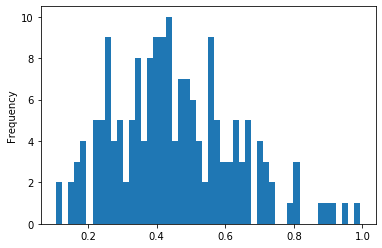

In [24]:
winning_trades.bbMidDist.plot.hist(bins=50)
merged_setups[merged_setups['spread'] >= 25]
#merged_setups.plot.scatter(x='spread', y='RMultiple', figsize=(10,6))

-13.71564540810208

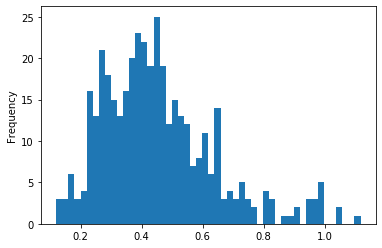

In [16]:
losing_trades.bbMidDist.plot.hist(bins=50)
losing_trades[losing_trades['bbMidDist'] >= 0.9].RMultiple.sum()

93.949133467175

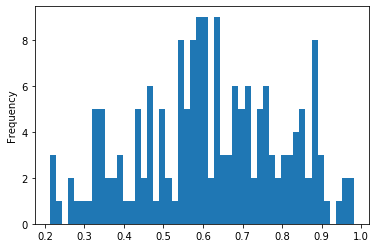

In [17]:
#winning_trades_desc
#winning_trades
winning_trades.ratioBody.plot.hist(bins=50)
winning_trades[winning_trades['ratioBody'] < 0.5].RMultiple.sum()

-91.17333307177466

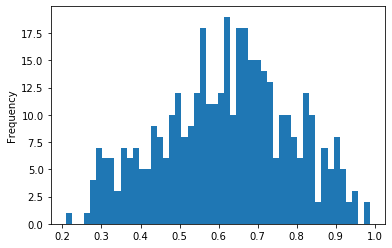

In [18]:
#losing_trades
#losing_trades_desc
#losing_trades.ratioBody.plot(kind='bar')
losing_trades.ratioBody.plot.hist(bins=50)
losing_trades[losing_trades['ratioBody'] < 0.5].RMultiple.sum()

In [19]:
#todo: look at size relative to ATR